In [3]:
# libraries
import pandas as pd
import numpy as np
import sklearn

In [23]:
# read data set

imp = pd.read_csv('https://github.com/tjsipin/MacDonald-REU-Summer-22/blob/main/models/data/gap_inp_early_2')


In [5]:
imp.head()

,Year,Country,Population,Cutaneous.Leishmaniasis,Dengue,Malaria,Mucosal.Leishmaniasis,Visceral.Leishmaniasis,Yellow.Fever,LST_Day,...,Dengue_Aeg_OptTemp,Chik_Alb_OptTemp,Chik_Aeg_OptTemp,Zika_OptTemp,Malaria_OptTemp,NDVI,EVI,Precip,StableLights,SWOccurrence
0,2007,Colombia,1801730,0.000555,0.002775,0.002220,0.00000,0.0,0.0,24.086593,...,0,14,0,0,22,0.500981,0.304495,2087.610085,37.972903,17.033807
1,2008,Colombia,1839334,0.005980,0.493657,0.010874,0.00000,0.0,0.0,23.432834,...,0,8,0,0,9,0.475580,0.287916,2553.313095,20.001042,17.033807
2,2009,Colombia,1894391,0.001584,0.218012,0.009502,0.00000,0.0,0.0,23.803182,...,1,9,1,1,16,0.527427,0.329218,1812.452090,38.951077,17.033807
3,2010,Colombia,1937458,0.003097,8.036303,0.018065,0.00000,0.0,0.0,24.686513,...,2,19,2,2,22,0.499809,0.312449,2402.545373,45.657085,17.033807
4,2011,Colombia,1960132,0.003061,0.409156,0.005102,0.00051,0.0,0.0,23.795693,...,0,13,0,0,18,0.492869,0.322488,2430.899353,40.699944,17.033807


In [6]:
# Descriptive statistics for each column
imp.describe()

,Year,Population,Cutaneous.Leishmaniasis,Dengue,Malaria,Mucosal.Leishmaniasis,Visceral.Leishmaniasis,Yellow.Fever,LST_Day,LST_Night,...,Dengue_Aeg_OptTemp,Chik_Alb_OptTemp,Chik_Aeg_OptTemp,Zika_OptTemp,Malaria_OptTemp,NDVI,EVI,Precip,StableLights,SWOccurrence
count,31887.000000,3.188700e+04,31887.000000,31887.000000,31887.000000,3.188700e+04,3.188700e+04,3.188700e+04,31887.000000,31887.000000,...,31887.000000,31887.000000,31887.000000,31887.000000,31887.000000,31887.000000,31887.000000,31887.000000,31887.000000,31887.000000
mean,2007.424499,4.810063e+04,0.944172,2.938452,5.713056,3.241586e-02,3.112830e-02,5.529735e-04,28.674784,18.372015,...,8.249130,11.264371,8.249130,8.249130,9.041145,0.608978,0.392105,1549.371957,3.704156,35.377127
std,3.793120,2.570814e+05,2.256622,8.199956,36.558068,9.212280e-02,1.105319e-01,2.081193e-02,3.253400,3.865745,...,5.155187,8.040556,5.155187,5.155187,7.308774,0.086126,0.066292,760.737413,8.674027,23.073426
min,2001.000000,1.960000e+02,0.000555,0.000000,0.000000,-9.325873e-17,-2.867498e-16,-2.263543e-17,11.213812,-2.752709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.076620,0.048846,0.000000,0.000000,0.000000
25%,2004.000000,6.850000e+03,0.091542,0.000000,0.000000,3.995702e-03,0.000000e+00,0.000000e+00,26.896206,16.788056,...,5.000000,5.000000,5.000000,5.000000,3.000000,0.565609,0.354735,1129.466975,0.175802,16.563696
50%,2008.000000,1.397900e+04,0.278242,0.336247,0.000000,9.289994e-03,0.000000e+00,0.000000e+00,28.975936,19.128340,...,8.000000,11.000000,8.000000,8.000000,8.000000,0.613781,0.395381,1430.004880,0.672119,29.800273
75%,2011.000000,2.887150e+04,0.866155,2.048545,0.048416,2.543914e-02,0.000000e+00,0.000000e+00,31.005919,21.049372,...,12.000000,16.000000,12.000000,12.000000,14.000000,0.665272,0.439420,1816.305773,2.729931,50.928932
max,2013.000000,9.895449e+06,91.746021,192.048518,1535.365979,3.194888e+00,2.743955e+00,2.088409e+00,42.284843,24.972378,...,30.000000,44.000000,30.000000,30.000000,42.000000,0.841319,0.560872,8613.400188,63.000000,97.943103


In [36]:
imp = pd.get_dummies(imp)
imp.columns

Index(['Year', 'Population', 'Cutaneous.Leishmaniasis', 'Dengue', 'Malaria',
       'Mucosal.Leishmaniasis', 'Visceral.Leishmaniasis', 'Yellow.Fever',
       'LST_Day', 'LST_Night', 'OptTemp_Obs', 'Dengue_Alb_OptTemp',
       'Dengue_Aeg_OptTemp', 'Chik_Alb_OptTemp', 'Chik_Aeg_OptTemp',
       'Zika_OptTemp', 'Malaria_OptTemp', 'NDVI', 'EVI', 'Precip',
       'StableLights', 'SWOccurrence', 'Country_Brazil', 'Country_Colombia',
       'Country_Peru'],
      dtype='object')

In [49]:
# use numpy to convert to arrays

# labels are the values we want to predict
labels = np.array(imp['Cutaneous.Leishmaniasis'])

# remove the labels from the features
# axis 1 refers to the columns
features = imp.drop('Cutaneous.Leishmaniasis', axis = 1)

# saving feature names for later use
feature_list = list(features.columns)

# convert features to numpy array
features = np.array(features)

In [51]:
# using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, 
    labels, 
    test_size=0.25,
    random_state=42)

print('Training Features Shape: ', train_features.shape)
print('Training Labels Shape: ', train_labels.shape)
print('Testing Features Shape: ', test_features.shape)
print('Testing Labels Shape: ', test_labels.shape)

Training Features Shape:  (23915, 24)
Training Labels Shape:  (23915,)
Testing Features Shape:  (7972, 24)
Testing Labels Shape:  (7972,)


In [2]:
# repeated random subsampling
from sklearn import model_selection
skf = model_selection.StratifiedKFold

In [17]:
# detect outliers
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [69]:
imp = pd.read_csv('//babylon/visitors/tjsipin/MacDonald-REU-Summer-22/gap_inp_early_2.csv')
imp_outliers = imp[is_outlier(imp['Cutaneous.Leishmaniasis'], thresh=3.5)]
imp_no_outliers = imp.drop(imp_outliers.index, axis=0)
imp_no_outliers['Cutaneous.Leishmaniasis'].describe()
imp_no_outliers['Cutaneous.Leishmaniasis'].describe()

C:\Users\tjsipin\AppData\Local\Temp\ipykernel_6256\154166971.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


count    26868.000000
mean         0.337995
std          0.352692
min          0.000555
25%          0.074188
50%          0.200839
75%          0.488908
max          1.475034
Name: Cutaneous.Leishmaniasis, dtype: float64

In [116]:
# toy example (logistic regression)
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns


# read data set

imp = pd.read_csv('//babylon/visitors/tjsipin/MacDonald-REU-Summer-22/gap_inp_early_2.csv')

imp_outliers = imp[is_outlier(imp['Cutaneous.Leishmaniasis'], thresh=3.5)]
imp_no_outliers = imp.drop(imp_outliers.index, axis=0)

imp_non_zero = imp[imp['Cutaneous.Leishmaniasis'] > 0]
imp = imp_outliers
imp = pd.get_dummies(imp)

# high vs. low thresh
hlt = imp['Cutaneous.Leishmaniasis'].describe()[6]

# Turned Cutaneous.Leishmaniasis to binary target (high vs. low)
imp.loc[imp['Cutaneous.Leishmaniasis'] < hlt, 'Cutaneous.Leishmaniasis'] = 0
imp.loc[imp['Cutaneous.Leishmaniasis'] > hlt, 'Cutaneous.Leishmaniasis'] = 1

x = imp.drop('Cutaneous.Leishmaniasis', axis = 1)
y = np.array(imp['Cutaneous.Leishmaniasis'])

# feature scaling for input features
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# create classifier object
lr = linear_model.LogisticRegression()

# create StratifiedKFold object

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(x_scaled, y):
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    lr.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))


# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))





C:\Users\tjsipin\AppData\Local\Temp\ipykernel_6256\154166971.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


List of possible accuracy: [0.7569721115537849, 0.7609561752988048, 0.7669322709163346, 0.7569721115537849, 0.7529880478087649, 0.7689243027888446, 0.7609561752988048, 0.750996015936255, 0.7529880478087649, 0.7644710578842315]

Maximum Accuracy That can be obtained from this model is: 76.89243027888446 %

Minimum Accuracy: 75.0996015936255 %

Overall Accuracy: 75.93156316848375 %

Standard Deviation is: 0.006169618702378489


c:\Users\tjsipin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='StableLights', ylabel='Cutaneous.Leishmaniasis'>

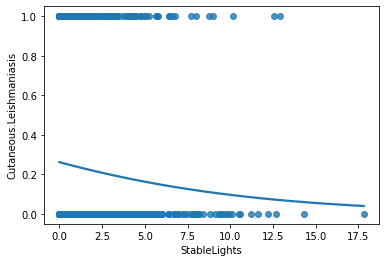

In [119]:
sns.regplot(x=imp['StableLights'], y=imp['Cutaneous.Leishmaniasis'], data=imp, logistic=True, ci=False)


In [111]:
imp.columns

Index(['Year', 'Population', 'Cutaneous.Leishmaniasis', 'Dengue', 'Malaria',
       'Mucosal.Leishmaniasis', 'Visceral.Leishmaniasis', 'Yellow.Fever',
       'LST_Day', 'LST_Night', 'OptTemp_Obs', 'Dengue_Alb_OptTemp',
       'Dengue_Aeg_OptTemp', 'Chik_Alb_OptTemp', 'Chik_Aeg_OptTemp',
       'Zika_OptTemp', 'Malaria_OptTemp', 'NDVI', 'EVI', 'Precip',
       'StableLights', 'SWOccurrence', 'Country_Brazil', 'Country_Colombia',
       'Country_Peru'],
      dtype='object')

In [91]:
imp = pd.read_csv('//babylon/visitors/tjsipin/MacDonald-REU-Summer-22/gap_inp_early_2.csv')

imp_outliers = imp[is_outlier(imp['Cutaneous.Leishmaniasis'], thresh=100)]
imp_no_outliers = imp.drop(imp_outliers.index, axis=0)

imp_non_zero = imp[imp['Cutaneous.Leishmaniasis'] > 0]
imp = imp_no_outliers
imp = pd.get_dummies(imp)

# high vs. low thresh
hlt = imp_no_outliers['Cutaneous.Leishmaniasis'].describe()[6]

# Turned Cutaneous.Leishmaniasis to binary target (high vs. low)
imp.loc[imp['Cutaneous.Leishmaniasis'] < hlt, 'Cutaneous.Leishmaniasis'] = 0
imp.loc[imp['Cutaneous.Leishmaniasis'] > hlt, 'Cutaneous.Leishmaniasis'] = 1

x = imp.drop('Cutaneous.Leishmaniasis', axis = 1)
y = np.array(imp['Cutaneous.Leishmaniasis'])

# feature scaling for input features
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
skf.split(x,y)

C:\Users\tjsipin\AppData\Local\Temp\ipykernel_6256\154166971.py:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  points = points[:,None]


<generator object _BaseKFold.split at 0x00000246944FA970>